# Sentiment Analysis of Airline Tweets

Mostly unmodified source - https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

# 1. Data Expolaration and Word Clouds

In [8]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
data_source_url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
airline_tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [10]:
airline_tweets.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

# Generating Word Clouds from our Tweets

In [11]:
text = " ".join(review for review in airline_tweets.text)
print("There are {} words in the combination of all review.".format(len(text)))

There are 1534594 words in the combination of all review.


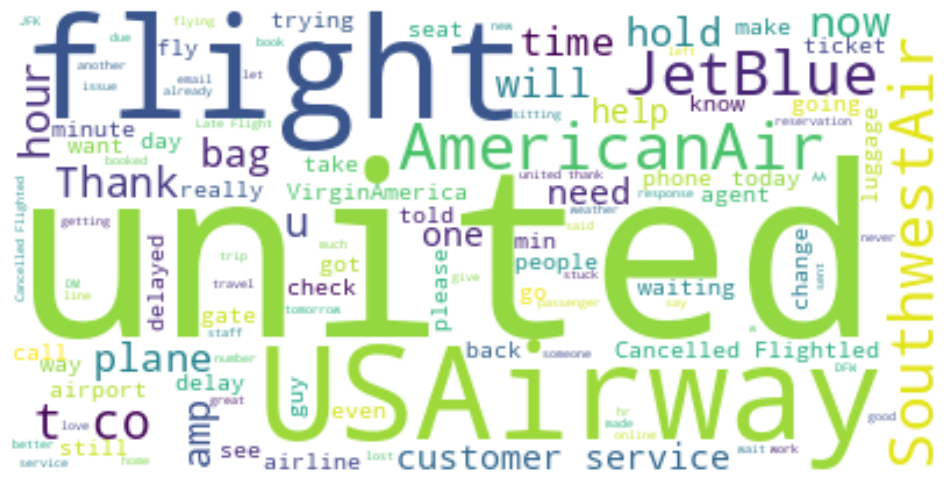

In [12]:
wordcloud = WordCloud(background_color ="white").generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

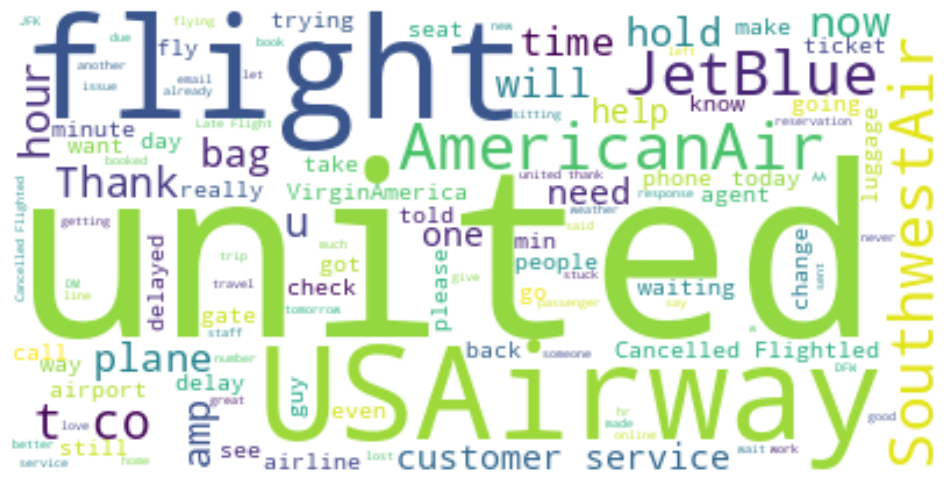

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(("united", "AmericanAir", "SouthwestAir", "JetBlue", "OSAirways", "VirginAmerica", "dhepburn", "said"))
wordCloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#2. Expoloratory Anaylsis & Feature Extraction

6.4
4.8


<Axes: ylabel='count'>

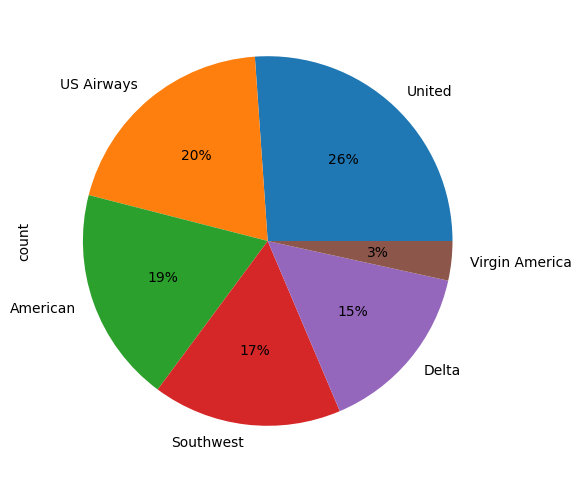

In [16]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
airline_tweets.airline.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

<Axes: ylabel='count'>

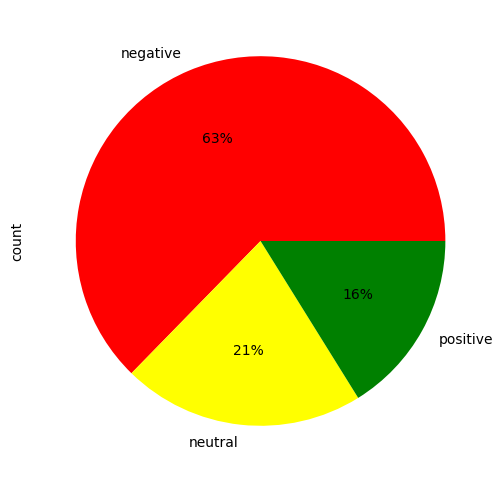

In [17]:
airline_tweets.airline_sentiment.value_counts().plot(kind = 'pie', autopct = '%1.0f%%', colors = ["red", "yellow", "green"])

In [20]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


<Axes: xlabel='airline'>

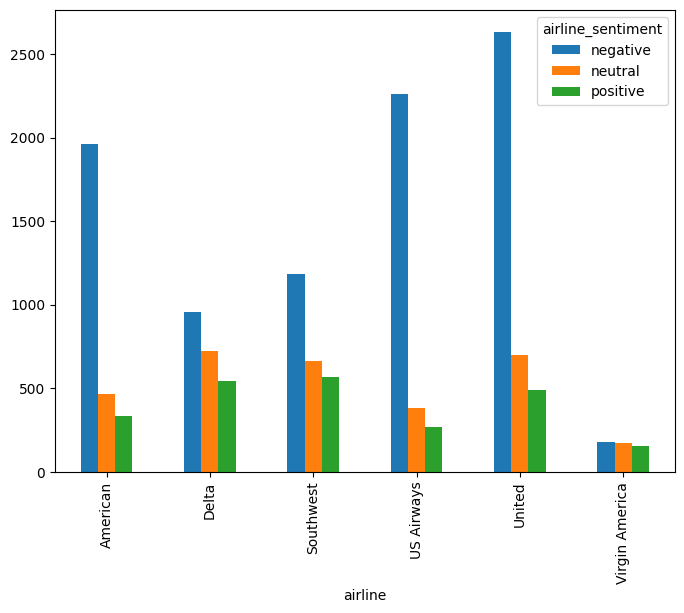

In [19]:
airline_sentiment.plot(kind = 'bar')

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

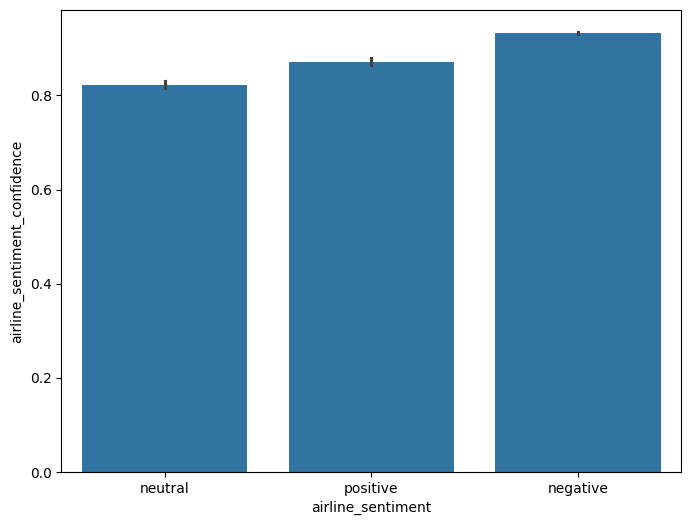

In [21]:
import seaborn as sns
sns.barplot(x = "airline_sentiment", y = "airline_sentiment_confidence", data = airline_tweets)

# Feature Extraction

In [26]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [27]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [28]:
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [29]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [53]:
processed_features = []
for sentence in range(0, len(features)):
  processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
  processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags = re.I)
  processed_feature = re.sub(r'^b\s+', ' ', processed_feature)
  processed_feature = processed_feature.lower()
  processed_features.append(processed_feature)

# 3. Creating our NLP Classifier Model

In [66]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words = stopwords.words('english'))
processed_features_vec = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size = 0.2, random_state = 0)

In [68]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [69]:
predictions = text_classifier.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy {0:.2f}%".format(100 *accuracy_score (y_test, predictions)))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

Accuracy 75.99%


In [72]:
for i in range(0, 5):
  randIndex = np.random.randint(0, len(processed_features))
  test_sample = processed_features[randIndex]
  print(test_sample)
  vector = vectorizer.transform([test_sample])
  output = text_classifier.predict(vector.toarray())
  print("Sentiment is -" +str(output[0]) + '\n')

 southwestair was earlier for reflight booking problems flight m on now didn get screencap just said unspecified error and to call swa
Sentiment is -negative

just sent thank rt united goodenufmother please dm your confirmation number if reflight booking problems is needed thank you ey
Sentiment is -neutral

 americanair waited on hold for two hours only to have my call really unreliable 
Sentiment is -negative

 united sent dm just now thanks am incredibly happy the fast response got via twitter than via customer care thank you
Sentiment is -positive

 united is horrible they lost our carseat and expect us to use loner carseat safety regulations say it illegal to use used car seat
Sentiment is -negative

